In [ ]:
import matplotlib.pyplot as plt
import cv2
def imshow(im,title='',type='',cv=True):
    if type:
        plt.imshow(im,cmap=type)
    else:
        if cv:
            plt.imshow(im[:,:,::-1])
        else:
            plt.imshow(im)
    plt.title(title)
    plt.axis('off')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from day16_1 import imshow
import cv2

In [11]:
cat1=cv2.imread('cat.jpg')
cat2=cv2.imread('cat2_1.jpg')
cat3=cv2.imread('cat3.jpg')
cat4=cv2.imread('cat4.jpg')
cat5=cv2.imread('cat11.jpg')
cat6=cv2.imread('cat12.png')



dog1=cv2.imread('dog.jpg')
dog2=cv2.imread('dog2.png')
dog3=cv2.imread('dog3.png')
dog4=cv2.imread('dog6.jpg')
dog5=cv2.imread('dog11.jpg')
dog6=cv2.imread('dog12.jpg')

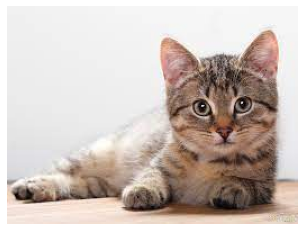

In [36]:
imshow(cat5)

In [18]:
sift_d=cv2.SIFT_create()
orb_d=cv2.ORB_create()

In [19]:
def detectAndCompute(detector,images):
    kps=[]
    des=[]
    for img in images:
        keypoint ,descripter=detector.detectAndCompute(img,None)
        kps.append(keypoint)
        des.append(descripter)
    return kps,des


In [20]:
images=[cat1,cat2,cat3,cat4,cat5,cat6,dog1,dog2,dog3,dog4,dog5,dog6]

In [21]:
sift_kp,sift_des=detectAndCompute(sift_d,images)
orb_kp,orb_des=detectAndCompute(orb_d,images)

In [22]:
len(sift_kp)

12

In [24]:
len(sift_kp[0])

1349

In [25]:
sift_kp[0]

(< cv2.KeyPoint 000001F38CA95360>,
 < cv2.KeyPoint 000001F38CB520F0>,
 < cv2.KeyPoint 000001F38CCE4B40>,
 < cv2.KeyPoint 000001F38CF3AFC0>,
 < cv2.KeyPoint 000001F38CF2BC00>,
 < cv2.KeyPoint 000001F38CF2BD80>,
 < cv2.KeyPoint 000001F38CF2BC60>,
 < cv2.KeyPoint 000001F38CA7BC90>,
 < cv2.KeyPoint 000001F38CF6B2D0>,
 < cv2.KeyPoint 000001F38CF6B1E0>,
 < cv2.KeyPoint 000001F38CF6B600>,
 < cv2.KeyPoint 000001F38CF6B810>,
 < cv2.KeyPoint 000001F38CF6B090>,
 < cv2.KeyPoint 000001F38CF6B9F0>,
 < cv2.KeyPoint 000001F38CF6BC60>,
 < cv2.KeyPoint 000001F38CF6B510>,
 < cv2.KeyPoint 000001F38CF6BF30>,
 < cv2.KeyPoint 000001F38CF6BCF0>,
 < cv2.KeyPoint 000001F38CF6B2A0>,
 < cv2.KeyPoint 000001F38CF6F8D0>,
 < cv2.KeyPoint 000001F38CF6F390>,
 < cv2.KeyPoint 000001F38CF6F6C0>,
 < cv2.KeyPoint 000001F38CF6F450>,
 < cv2.KeyPoint 000001F38CA3A8D0>,
 < cv2.KeyPoint 000001F38CF5C450>,
 < cv2.KeyPoint 000001F38CF5CAE0>,
 < cv2.KeyPoint 000001F38CF5C0C0>,
 < cv2.KeyPoint 000001F38D1B6690>,
 < cv2.KeyPoint 0000

In [31]:
len(sift_kp[5])

100

In [28]:
for kp in sift_kp:
    print(len(kp))

1349
315
1734
353
353
100
555
5799
626
307
439
250


In [29]:
for kp in orb_kp:
    print(len(kp))

500
374
500
383
383
39
500
500
500
406
394
401


In [33]:
def drawKeypoint(img,kp):
    img_kp=cv2.drawKeypoints(
        img,kp,0,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    imshow(img_kp)
    plt.show()

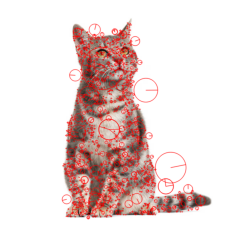

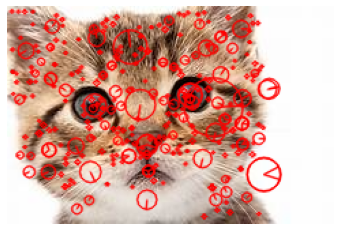

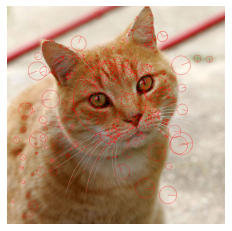

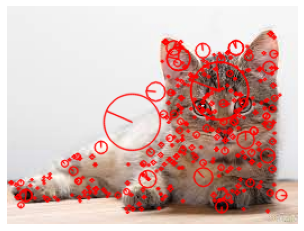

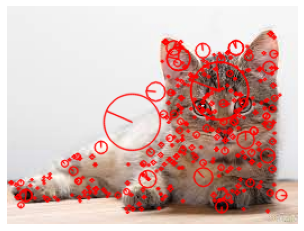

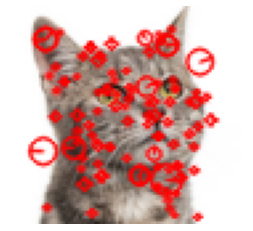

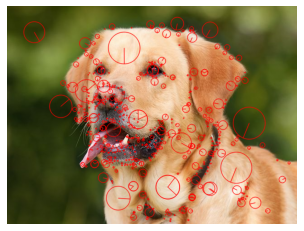

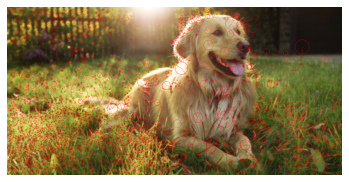

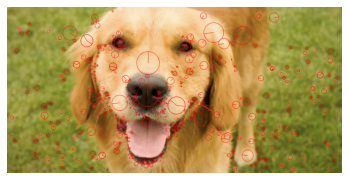

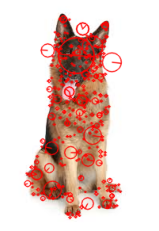

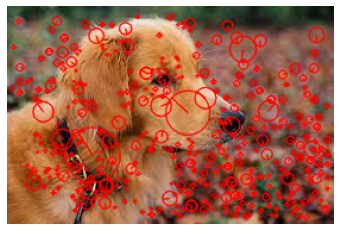

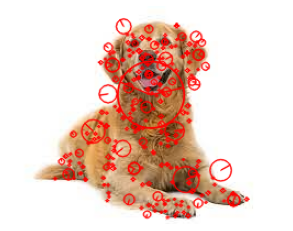

In [34]:
for img ,kp in zip(images,sift_kp):
    drawKeypoint(img,kp)

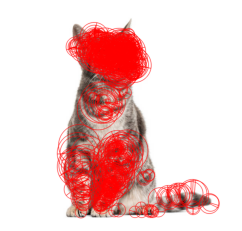

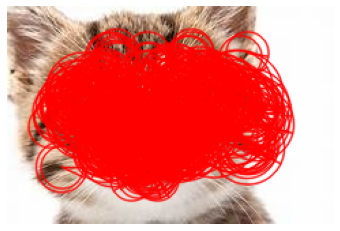

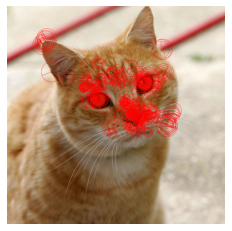

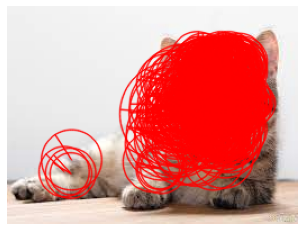

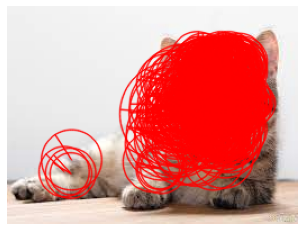

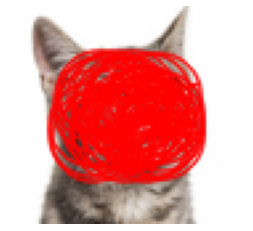

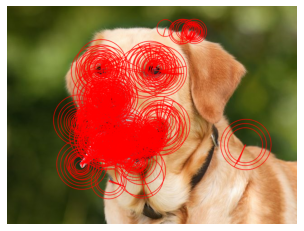

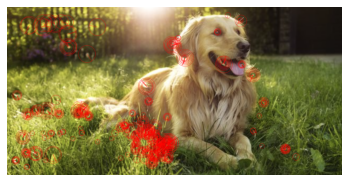

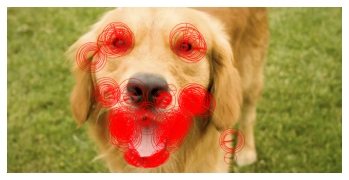

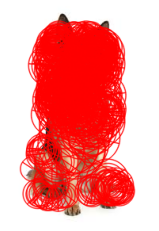

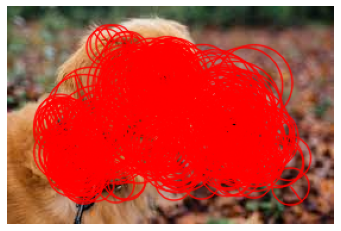

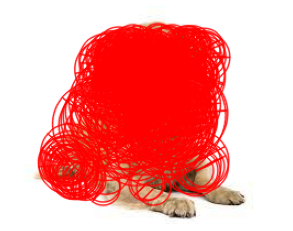

In [37]:
for img ,kp in zip(images,orb_kp):
    drawKeypoint(img,kp)

In [38]:
matcher = cv2.BFMatcher()

In [39]:
def compare_des(query,descs):
    result=[]
    for des in descs:
        matches=matcher.match(query,des)
        matches=[val.distance for val in matches]
        mean=np.mean(matches)
        result.append(mean)

    return result

In [40]:
sift_res=compare_des(sift_des[-1] , sift_des[:-1])
orb_res=compare_des(sift_des[-1] , sift_des[:-1])

In [41]:
sift_res

[308.33109448242186,
 339.1293103027344,
 316.1603695678711,
 332.60568475341796,
 332.60568475341796,
 362.6275562133789,
 330.2196009521484,
 298.31542602539065,
 324.78573046875,
 341.2959225463867,
 338.7320113525391]

In [42]:
orb_res

[308.33109448242186,
 339.1293103027344,
 316.1603695678711,
 332.60568475341796,
 332.60568475341796,
 362.6275562133789,
 330.2196009521484,
 298.31542602539065,
 324.78573046875,
 341.2959225463867,
 338.7320113525391]

In [43]:
labels=['cat','cat','cat','cat','cat','cat','Dog','Dog','Dog','Dog','Dog']

In [44]:
predict=labels[sift_res.index(min(sift_res))]
print(predict)

Dog


In [45]:
#for cat image display

In [47]:
sift_res=compare_des(sift_des[1] , sift_des[1:])
orb_res=compare_des(sift_des[1] , sift_des[1:])

In [48]:
sift_res

[0.0,
 318.65828915550594,
 339.3125270782955,
 339.3125270782955,
 375.05418308803013,
 334.70065157451324,
 303.55887620713975,
 334.083605133541,
 350.6463902064732,
 342.9537552122086,
 347.0288311186291]

In [49]:
orb_res

[0.0,
 318.65828915550594,
 339.3125270782955,
 339.3125270782955,
 375.05418308803013,
 334.70065157451324,
 303.55887620713975,
 334.083605133541,
 350.6463902064732,
 342.9537552122086,
 347.0288311186291]

In [50]:
labels=['cat','cat','cat','cat','cat','Dog','Dog','Dog','Dog','Dog','Dog']

In [51]:
prediction=labels[sift_res.index(min(sift_res))]  #we are go through min approch approch
print(prediction)

cat
